In [201]:
import re
import nltk

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Представление и предобработка текстовых данных в виде последовательностей

1.1 Представьте первое предложение из строки `text` как последовательность из индексов слов, входящих в это предложение

In [203]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

In [204]:

# Токенизация предложения
tokens = word_tokenize(text)

# Создание словаря, сопоставляющего слова и индексы
word_index = {word: index for index, word in enumerate(tokens, start=1)}

# Преобразование слов в индексы
indexes = [word_index[word] for word in tokens]

print(indexes)

[1, 2, 3, 16, 5, 12, 7, 8, 21, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


1.2 Представьте первое предложение из строки `text` как последовательность векторов, соответствующих индексам слов. Для представления индекса в виде вектора используйте унитарное кодирование. В результате должен получиться двумерный тензор размера `количество слов в предложении` x `количество уникальных слов`

In [205]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

In [206]:
tokens

['Select',
 'your',
 'preferences',
 'and',
 'run',
 'the',
 'install',
 'command',
 '.',
 'Stable',
 'represents',
 'the',
 'most',
 'currently',
 'tested',
 'and',
 'supported',
 'version',
 'of',
 'PyTorch',
 '.',
 'Note',
 'that',
 'LibTorch',
 'is',
 'only',
 'available',
 'for',
 'C++']

In [207]:
num_classes = len(indexes) + 1 # Увеличиваем num_classes на 1
one_hot_vectors = [torch.nn.functional.one_hot(torch.tensor(word_index[word])).float() for word in tokens]

# Преобразование списка унитарных кодов в двумерный тензор
# tensor_representation = torch.stack(one_hot_vectors)

print(one_hot_vectors )

[tensor([0., 1.]), tensor([0., 0., 1.]), tensor([0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), tensor([0., 0., 0., 0

In [208]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import FreqDist
words = word_tokenize(text)

# Создание словаря частотности слов
freq_dist = FreqDist(words)

# Определение уникальных слов
unique_words = list(freq_dist.keys())

# Присвоение индексов уникальным словам
word_to_index = {word: index for index, word in enumerate(unique_words)}

# Функция для создания one-hot вектора
def one_hot(index, vocab_size):
    vector = np.zeros(vocab_size)
    vector[index] = 1
    return vector

# Создание one-hot тензора
tensor = np.array([one_hot(word_to_index[word], len(unique_words)) for word in words])

print("One-hot кодирование:")
print(tensor)

One-hot кодирование:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

1.3 Решите задачу 1.2, используя модуль `nn.Embedding`

## 2. Классификация фамилий по национальности (ConvNet)

Датасет: https://disk.yandex.ru/d/owHew8hzPc7X9Q?w=1

2.1 Считать файл `surnames/surnames.csv`.

2.2 Закодировать национальности числами, начиная с 0.

2.3 Разбить датасет на обучающую и тестовую выборку

2.4 Реализовать класс `Vocab` (токен = __символ__)
  * добавьте в словарь специальный токен `<PAD>` с индексом 0
  * при создании словаря сохраните длину самой длинной последовательности из набора данных в виде атрибута `max_seq_len`

2.5 Реализовать класс `SurnamesDataset`
  * метод `__getitem__` возвращает пару: <последовательность индексов токенов (см. 1.1 ), номер класса>
  * длина каждой такой последовательности должна быть одинаковой и равной `vocab.max_seq_len`. Чтобы добиться этого, дополните последовательность справа индексом токена `<PAD>` до нужной длины

2.6. Обучить классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding`. Рассмотрите два варианта:
    - когда токен представляется в виде унитарного вектора и модуль `nn.Embedding` не обучается
    - когда токен представляется в виде вектора небольшой размерности (меньше, чем размер словаря) и модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

2.1 Считать файл surnames/surnames.csv.

In [209]:
import pandas as pd

# Считывание файла CSV в DataFrame
df = pd.read_csv("/content/drive/MyDrive/datasets/surnames.csv")
df['surname'] = df['surname'].str.lower()
df['nationality'] = df['nationality'].str.lower()
df

,surname,nationality
0,woodford,english
1,coté,french
2,kore,english
3,koury,arabic
4,lebzak,russian
...,...,...
10975,quraishi,arabic
10976,innalls,english
10977,król,polish
10978,purvis,english


In [210]:
mean_samples = df['nationality'].value_counts().mean()
# Балансировка классов
df = df.groupby('nationality', group_keys=False).apply(lambda x: x.sample(int(mean_samples), replace=True))

# Вывод балансированного DataFrame
df

,surname,nationality
8053,toma,arabic
3166,maalouf,arabic
2322,issa,arabic
10828,ghanem,arabic
10203,rahal,arabic
...,...,...
2492,vuong,vietnamese
3550,dinh,vietnamese
1046,trieu,vietnamese
2843,ha,vietnamese


2.2 Закодировать национальности числами, начиная с 0.

In [211]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Кодирование столбца 'nationality'
df['nationality_encoded'] = label_encoder.fit_transform(df['nationality'])

df

,surname,nationality,nationality_encoded
8053,toma,arabic,0
3166,maalouf,arabic,0
2322,issa,arabic,0
10828,ghanem,arabic,0
10203,rahal,arabic,0
...,...,...,...
2492,vuong,vietnamese,17
3550,dinh,vietnamese,17
1046,trieu,vietnamese,17
2843,ha,vietnamese,17


In [212]:
df['nationality'].value_counts()

arabic        610
chinese       610
spanish       610
scottish      610
russian       610
portuguese    610
polish        610
korean        610
japanese      610
italian       610
irish         610
greek         610
german        610
french        610
english       610
dutch         610
czech         610
vietnamese    610
Name: nationality, dtype: int64

2.3 Разбить датасет на обучающую и тестовую выборку

In [213]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df['surname']
y = df['nationality_encoded']

# Разделение на обучающую и тестовую выборку (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 8784
Размер тестовой выборки: 2196


2.4 Реализовать класс Vocab (токен = символ)

добавьте в словарь специальный токен <PAD> с индексом 0
при создании словаря сохраните длину самой длинной последовательности из набора данных в виде атрибута max_seq_len

In [214]:
class Vocab:
    def __init__(self, data):
        self.idx_to_token, self.token_to_idx = self.build_vocab(data)
        self.vocab_len = len(self.idx_to_token)
        self.max_seq_len = self.calculate_max_seq_len(data)

    def build_vocab(self, data):
        # Добавление специального токена с индексом 0
        unique_tokens = ['<PAD>'] + list(set(''.join(data)))
        idx_to_token = {i: token for i, token in enumerate(unique_tokens)}
        token_to_idx = {token: i for i, token in enumerate(unique_tokens)}
        return idx_to_token, token_to_idx

    def calculate_max_seq_len(self, data):
        # Расчет длины самой длинной последовательности
        return max(len(seq) for seq in data)

# Пример использования
data = df['surname']
vocab = Vocab(data)

print("Index to Token:", vocab.idx_to_token)
print("Token to Index:", vocab.token_to_idx)
print("Vocabulary Length:", vocab.vocab_len)
print("Max Sequence Length:", vocab.max_seq_len)


Index to Token: {0: '<PAD>', 1: 'õ', 2: 'o', 3: 'ń', 4: '-', 5: 'k', 6: 'd', 7: 'ú', 8: 'ì', 9: 'c', 10: 'z', 11: 'g', 12: 'l', 13: 'é', 14: 'a', 15: "'", 16: 'ó', 17: 'f', 18: 'j', 19: 'è', 20: 't', 21: 'h', 22: 'p', 23: 'b', 24: 'á', 25: '/', 26: 'ù', 27: 'ü', 28: 'í', 29: 'q', 30: 'ß', 31: 'ś', 32: 'v', 33: 'ñ', 34: 'w', 35: ':', 36: 'x', 37: 'y', 38: 'i', 39: 'ê', 40: 's', 41: 'r', 42: 'e', 43: 'ł', 44: '1', 45: 'ą', 46: 'u', 47: 'ä', 48: 'ż', 49: 'à', 50: 'ã', 51: 'ö', 52: 'm', 53: 'n'}
Token to Index: {'<PAD>': 0, 'õ': 1, 'o': 2, 'ń': 3, '-': 4, 'k': 5, 'd': 6, 'ú': 7, 'ì': 8, 'c': 9, 'z': 10, 'g': 11, 'l': 12, 'é': 13, 'a': 14, "'": 15, 'ó': 16, 'f': 17, 'j': 18, 'è': 19, 't': 20, 'h': 21, 'p': 22, 'b': 23, 'á': 24, '/': 25, 'ù': 26, 'ü': 27, 'í': 28, 'q': 29, 'ß': 30, 'ś': 31, 'v': 32, 'ñ': 33, 'w': 34, ':': 35, 'x': 36, 'y': 37, 'i': 38, 'ê': 39, 's': 40, 'r': 41, 'e': 42, 'ł': 43, '1': 44, 'ą': 45, 'u': 46, 'ä': 47, 'ż': 48, 'à': 49, 'ã': 50, 'ö': 51, 'm': 52, 'n': 53}
Vocabu

2.5 Реализовать класс SurnamesDataset

метод __getitem__ возвращает пару: <последовательность индексов токенов (см. 1.1 ), номер класса>
длина каждой такой последовательности должна быть одинаковой и равной vocab.max_seq_len. Чтобы добиться этого, дополните последовательность справа индексом токена <PAD> до нужной длины

In [215]:
class SentimentDataset(Dataset):
    def __init__(self, data, max_seq_len):
        self.data = data
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text_indices = self.data.iloc[idx]['text_indices']
        sentiment = torch.tensor(self.data.iloc[idx]['sentiment'], dtype=torch.float32)

        # Padding or truncation to make sequences equal length
        if len(text_indices) < self.max_seq_len:
            text_indices = text_indices + [0] * (self.max_seq_len - len(text_indices))
        else:
            text_indices = text_indices[:self.max_seq_len]

        return torch.tensor(text_indices, dtype=torch.long), sentiment

In [216]:
import torch
from torch.utils.data import Dataset

class SurnamesDataset(Dataset):
    def __init__(self, X, y, vocab):
        self.X = X
        self.y = y
        self.vocab = vocab

    def vectorize(self, surname):
        vectorized_surname = torch.zeros(self.vocab.max_seq_len, dtype=torch.float32)
        for i, char in enumerate(surname):
            if i < self.vocab.max_seq_len and char in self.vocab.token_to_idx:
                vectorized_surname[i] = self.vocab.token_to_idx[char]
        return vectorized_surname

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        surname = self.X.iloc[idx]
        vectorized_surname = self.vectorize(surname)
        label = torch.tensor(self.y.iloc[idx])
        return vectorized_surname, label

# Пример использования
# (Предполагается, что у вас уже есть объект vocab)
dataset = SurnamesDataset(X_train, y_train, vocab)

# Пример доступа к данным
sample = dataset[0]
print("Vectorized Surname:", sample[0])
print("Label:", sample[1])


Vectorized Surname: tensor([10., 21., 38., 53.,  2., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.])
Label: tensor(14)


In [217]:
sample

(tensor([10., 21., 38., 53.,  2., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]),
 tensor(14))

2.6. Обучить классификатор.

Для преобразования последовательности индексов в последовательность векторов используйте nn.Embedding. Рассмотрите два варианта:

когда токен представляется в виде унитарного вектора и модуль nn.Embedding не обучается
когда токен представляется в виде вектора небольшой размерности (меньше, чем размер словаря) и модуль nn.Embedding обучается
Используйте одномерные свертки и пулинг (nn.Conv1d, nn.MaxPool1d)

обратите внимание, что nn.Conv1d ожидает на вход трехмерный тензор размерности (batch, embedding_dim, seq_len)

In [218]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import random
import torchvision
import zipfile
from tqdm import tqdm

In [219]:
pip install torchvision

In [220]:
def train(model, optimizer, train_loader, device, criterion, n_epochs):
    # Переводим модель в режим обучения
    model.train()
    model.to(device)
    # Список для хранения значений функции потерь
    losses_per_epoch = []

    for epoch in range(1, n_epochs + 1):
        list_process = []  # Очищаем список для каждой эпохи

        for batch_idx, (data, target) in enumerate(train_loader):
            # Переносим данные и цели на указанное устройство (например, GPU)
            data, target = data.to(device), target.to(device)

            target = target.type(torch.int64)

            # Обнуляем градиенты оптимизатора
            optimizer.zero_grad()

            # Подсчет прогнозов модели
            output = model(data).type(torch.float32)

            # Вычисление функции потерь (лосса) между прогнозами и истинными значениями
            loss = criterion(output, target)

            # Расчет градиентов и выполнение одного шага оптимизатора
            loss.backward()
            optimizer.step()

            # Добавляем значение лосса в список процесса обучения
            list_process.append(loss.item())

            if batch_idx % 100 == 0:
                # Выводим информацию о процессе обучения каждые 100 батчей
                print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                      f'({100. * batch_idx / len(train_loader):.2f}%)]\tLoss: {loss.item():.6f}')

        # Выводим общую информацию о лоссе на данной эпохе
        epoch_loss = sum(list_process) / len(list_process)
        print(f'Train Epoch: {epoch}\tAverage Loss: {epoch_loss:.6f}')
        losses_per_epoch.append(epoch_loss)

    return losses_per_epoch

def display_images_with_predictions(model, test_loader, device):
    num_images_to_show = 5
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(12, 3))

    model.eval()
    with torch.no_grad():
        for i in range(num_images_to_show):
            index = random.randint(0, len(test_loader.dataset) - 1)
            image, label = test_loader.dataset[index]
            image = image.to(device)
            output = model(image)
            _, predicted = torch.max(output, 1)
            image = image.permute(1, 2, 0).cpu().numpy()

            axes[i].imshow(image)
            axes[i].set_title(f"True: {label}, Predicted: {predicted.item()}")
            axes[i].axis('off')

    plt.show()


def train_and_evaluate_model(model, optimizer, train_loader, test_loader, device, criterion, n_epochs):
    # Обучение модели
    losses_per_epoch = train(model, optimizer, train_loader, device, criterion, n_epochs)

    # Вывод графика функции потерь по эпохам
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, n_epochs + 1), losses_per_epoch)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

    # Оценка модели на тестовом наборе
    model.eval()
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Вывод матрицы ошибок
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Вывод точности на тестовом наборе
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

    # Демонстрация работы модели
    # display_images_with_predictions(model, test_loader, device)


Train Epoch: 1 [0/8784 (0.00%)]	Loss: 2.961950
Train Epoch: 1 [6400/8784 (72.46%)]	Loss: 1.750250
Train Epoch: 1	Average Loss: 2.135443
Train Epoch: 2 [0/8784 (0.00%)]	Loss: 1.577981
Train Epoch: 2 [6400/8784 (72.46%)]	Loss: 1.208155
Train Epoch: 2	Average Loss: 1.299960
Train Epoch: 3 [0/8784 (0.00%)]	Loss: 1.002646
Train Epoch: 3 [6400/8784 (72.46%)]	Loss: 1.115532
Train Epoch: 3	Average Loss: 0.971481
Train Epoch: 4 [0/8784 (0.00%)]	Loss: 0.823432
Train Epoch: 4 [6400/8784 (72.46%)]	Loss: 0.947192
Train Epoch: 4	Average Loss: 0.781912
Train Epoch: 5 [0/8784 (0.00%)]	Loss: 0.667058
Train Epoch: 5 [6400/8784 (72.46%)]	Loss: 0.727983
Train Epoch: 5	Average Loss: 0.650826


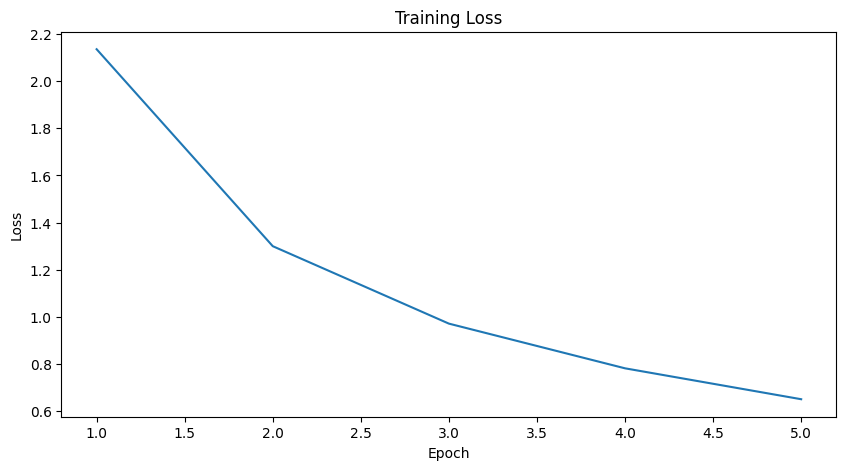

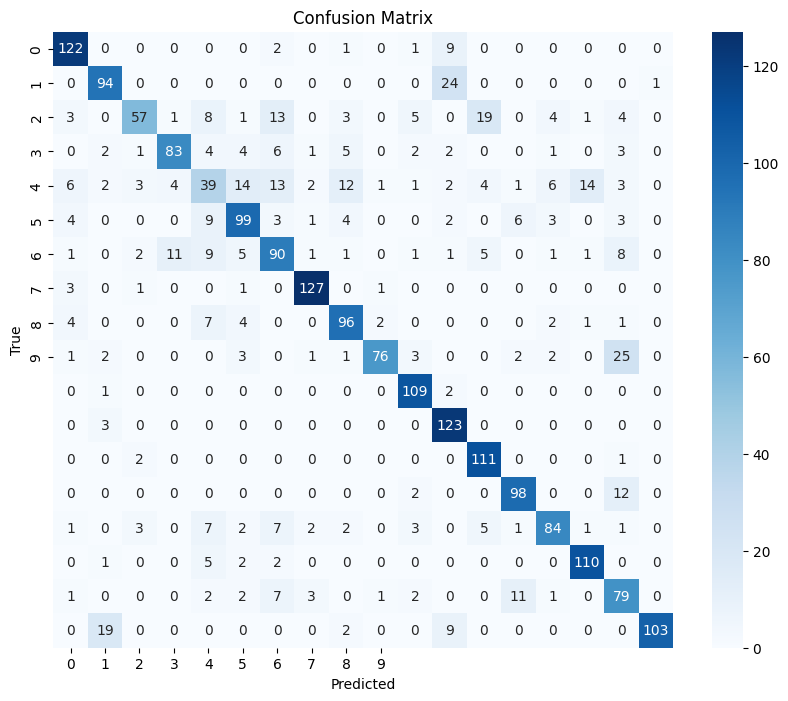

Accuracy on the test set: 77.41%


In [221]:
class SurnameClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes, kernel_size, pool_size):
        super(SurnameClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1d = nn.Conv1d(embedding_dim, 128, kernel_size)
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool1d(pool_size)
        self.flatten = nn.Flatten()
        # Adjust the input size for the linear layer
        self.fc = nn.Linear(128 * ((vocab.max_seq_len - kernel_size + 1) // pool_size), num_classes)

    def forward(self, x):
        embedded = self.embedding(x.long())
        conv_output = self.conv1d(embedded.permute(0, 2, 1))  # Conv1d expects (batch, channels, seq_len)
        activated = self.relu(conv_output)
        pooled = self.max_pool(activated)
        flattened = self.flatten(pooled)
        logits = self.fc(flattened)
        return logits


# Параметры модели и обучения
vocab_size = vocab.vocab_len
embedding_dim = 50
num_classes = len(df['nationality'].unique())
kernel_size = 3
pool_size = 2
learning_rate = 0.001
batch_size = 64
n_epochs = 5

# Создание модели, оптимизатора и функции потерь
model = SurnameClassifier(vocab_size, embedding_dim, num_classes, kernel_size, pool_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_dataset = SurnamesDataset(X_train, y_train, vocab)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = SurnamesDataset(X_test, y_test, vocab)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
device = 'cpu'
train_and_evaluate_model(model, optimizer, train_loader, test_loader, device, criterion, n_epochs)

In [222]:
vocab_size

54

In [223]:
vocab.max_seq_len

17

In [224]:
num_classes

18

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

In [225]:
# Проверка работоспособности модели на нескольких фамилиях студентов
student_surnames = ["Farkhutdinov", "Gabdulhakov","Sidorenko", "Gilmullin", "Khafizova", "Kislitsyna"]

for surname in student_surnames:
    vectorized_surname = test_dataset.vectorize(surname)
    input_tensor = vectorized_surname.clone().detach().unsqueeze(0)
    output = model(input_tensor.long())  # Convert the input tensor to LongTensor
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]
    top_probabilities, top_indices = torch.topk(probabilities, 3)
    predicted_nationalities = [
        (label_encoder.classes_[idx], f"{prob.item() * 100:.2f}%") for idx, prob in zip(top_indices, top_probabilities)
    ]
    print(f"Surname: {surname}, Predictions: {predicted_nationalities}")


tensor([[ 0., 14., 41.,  5., 21., 46., 20.,  6., 38., 53.,  2., 32.,  0.,  0.,
          0.,  0.,  0.]])
Surname: Farkhutdinov, Predictions: [('russian', '99.91%'), ('english', '0.07%'), ('german', '0.01%')]
tensor([[ 0., 14., 23.,  6., 46., 12., 21., 14.,  5.,  2., 32.,  0.,  0.,  0.,
          0.,  0.,  0.]])
Surname: Gabdulhakov, Predictions: [('russian', '99.87%'), ('czech', '0.06%'), ('english', '0.05%')]
tensor([[ 0., 38.,  6.,  2., 41., 42., 53.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]])
Surname: Sidorenko, Predictions: [('russian', '80.88%'), ('japanese', '9.42%'), ('english', '4.28%')]
tensor([[ 0., 38., 12., 52., 46., 12., 12., 38., 53.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]])
Surname: Gilmullin, Predictions: [('russian', '59.39%'), ('irish', '12.68%'), ('german', '11.40%')]
tensor([[ 0., 21., 14., 17., 38., 10.,  2., 32., 14.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]])
Surname: Khafizova, Predictions: [('czech', '84.93%'), ('russian', '1

## 3. Классификация обзоров на фильмы (ConvNet)

Датасет: https://disk.yandex.ru/d/tdinpb0nN_Dsrg

2.1 Создайте набор данных на основе файлов polarity/positive_reviews.csv (положительные отзывы) и polarity/negative_reviews.csv (отрицательные отзывы). Разбейте на обучающую и тестовую выборку.
  * токен = __слово__
  * данные для обучения в датасете представляются в виде последовательности индексов токенов
  * словарь создается на основе _только_ обучающей выборки. Для корректной обработки ситуаций, когда в тестовой выборке встретится токен, который не хранится в словаре, добавьте в словарь специальный токен `<UNK>`
  * добавьте предобработку текста

2.2. Обучите классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding`
    - подберите адекватную размерность вектора эмбеддинга:
    - модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`


2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)
* Целевое значение accuracy на валидации - 70+%

2.1 Создайте набор данных на основе файлов polarity/positive_reviews.csv (положительные отзывы) и polarity/negative_reviews.csv (отрицательные отзывы). Разбейте на обучающую и тестовую выборку.

токен = слово
данные для обучения в датасете представляются в виде последовательности индексов токенов
словарь создается на основе только обучающей выборки. Для корректной обработки ситуаций, когда в тестовой выборке встретится токен, который не хранится в словаре, добавьте в словарь специальный токен <UNK>
добавьте предобработку текста

In [226]:
import torch

file_path = "/content/drive/MyDrive/datasets/positive_reviews.txt"
# Read the text file into a Pandas DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Create a DataFrame with the reviews and sentiment labels
df1 = pd.DataFrame({'text': reviews, 'sentiment': ''})

# Preprocess the text data
df1['text'] = df1['text'].apply(lambda x: x.lower().strip())  # Convert to lowercase and remove leading/trailing whitespaces

# For demonstration purposes, let's randomly assign sentiments for each review
import random
df1['sentiment'] = 1

# Print the DataFrame
print(df1.head())


                                                text  sentiment
0                   simplistic , silly and tedious .          1
1  it's so laddish and juvenile , only teenage bo...          1
2  exploitative and largely devoid of the depth o...          1
3  [garbus] discards the potential for pathologic...          1
4  a visually flashy but narratively opaque and e...          1


In [227]:
file_path = "/content/drive/MyDrive/datasets/negative_reviews.txt"
# Read the text file into a Pandas DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Create a DataFrame with the reviews and sentiment labels
df2 = pd.DataFrame({'text': reviews, 'sentiment': ''})

# Preprocess the text data
df2['text'] = df2['text'].apply(lambda x: x.lower().strip())  # Convert to lowercase and remove leading/trailing whitespaces

# For demonstration purposes, let's randomly assign sentiments for each review
import random
df2['sentiment'] = 0
# Print the DataFrame
print(df2.head())

                                                text  sentiment
0  the rock is destined to be the 21st century's ...          0
1  the gorgeously elaborate continuation of " the...          0
2                     effective but too-tepid biopic          0
3  if you sometimes like to go to the movies to h...          0
4  emerges as something rare , an issue movie tha...          0


In [228]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [229]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Read positive reviews
file_path_positive = "/content/drive/MyDrive/datasets/positive_reviews.txt"
with open(file_path_positive, 'r', encoding='utf-8') as file:
    positive_reviews = file.readlines()

# Read negative reviews
file_path_negative = "/content/drive/MyDrive/datasets/negative_reviews.txt"
with open(file_path_negative, 'r', encoding='utf-8') as file:
    negative_reviews = file.readlines()

# Create DataFrames
df_positive = pd.DataFrame({'text': positive_reviews, 'sentiment': 1})
df_negative = pd.DataFrame({'text': negative_reviews, 'sentiment': 0})

# Concatenate DataFrames
df = pd.concat([df_positive, df_negative], ignore_index=True)

# Preprocess text
def preprocess_text(text: str) -> str:
    # Приведение строки к нижнему регистру
    text = text.lower()

    # Замена всех символов, кроме a-z, A-Z на пробел
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Токенизация
    tokens = word_tokenize(text)

    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Удаление стоп-слов
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Объединение токенов в строку
    processed_text = ' '.join(filtered_tokens)

    return processed_text

df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Build vocabulary based on the training set
all_words = ' '.join(train_data['text']).split()
word_counter = Counter(all_words)
vocab = ['<PAD>', '<UNK>'] + [word for word, freq in word_counter.items() if freq > 1]

# Create a word-to-index mapping
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Tokenize and convert text to sequences of indices
def tokenize_and_index(text):
    tokens = text.split()
    indices = [word_to_index.get(token, word_to_index['<UNK>']) for token in tokens]
    return indices

train_data['text_indices'] = train_data['text'].apply(tokenize_and_index)
test_data['text_indices'] = test_data['text'].apply(tokenize_and_index)
train_data['text_indices'] = train_data['text_indices'].apply(lambda x: [float(i) for i in x])
test_data['text_indices'] = test_data['text_indices'].apply(lambda x: [float(i) for i in x])
# Print the first few rows of the preprocessed data
print(train_data.head())


                                                    text  sentiment  \
10190  rarely ha skin looked beautiful desirable even...          0   
10291         like brosnan performance evelyn come heart          0   
6930   celebrates group playful spark nonconformity g...          0   
3038    lousy movie merely unwatchable also unlistenable          1   
4058   one shake feeling crossroad nothing hour half ...          1   

                                            text_indices  
10190  [2.0, 3.0, 4.0, 5.0, 6.0, 1.0, 7.0, 8.0, 9.0, ...  
10291               [13.0, 14.0, 15.0, 16.0, 17.0, 18.0]  
6930   [19.0, 20.0, 21.0, 22.0, 1.0, 1.0, 23.0, 24.0,...  
3038                 [28.0, 29.0, 30.0, 31.0, 32.0, 1.0]  
4058   [33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40....  


'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .\n'

5331

2.2. Обучите классификатор.

Для преобразования последовательности индексов в последовательность векторов используйте nn.Embedding

подберите адекватную размерность вектора эмбеддинга:
модуль nn.Embedding обучается
Используйте одномерные свертки и пулинг (nn.Conv1d, nn.MaxPool1d)

обратите внимание, что nn.Conv1d ожидает на вход трехмерный тензор размерности (batch, embedding_dim, seq_len)

In [231]:
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, data, max_seq_len):
        self.data = data
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text_indices = self.data.iloc[idx]['text_indices']
        sentiment = torch.tensor(self.data.iloc[idx]['sentiment'], dtype=torch.float32)

        # Padding or truncation to make sequences equal length
        if len(text_indices) < self.max_seq_len:
            text_indices = text_indices + [0] * (self.max_seq_len - len(text_indices))
        else:
            text_indices = text_indices[:self.max_seq_len]

        return torch.tensor(text_indices, dtype=torch.long), sentiment

# Пример использования
max_seq_len = max(train_data['text_indices'].apply(len))
train_dataset = SentimentDataset(train_data, max_seq_len)
test_dataset = SentimentDataset(test_data, max_seq_len)
from torch.utils.data import DataLoader

batch_size = 64  # Выберите подходящий размер пакета

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


Train Epoch: 1 [0/8529 (0.00%)]	Loss: 0.707576
Train Epoch: 1 [6400/8529 (74.63%)]	Loss: 0.682596
Train Epoch: 1	Average Loss: 0.696711
Train Epoch: 2 [0/8529 (0.00%)]	Loss: 0.606121
Train Epoch: 2 [6400/8529 (74.63%)]	Loss: 0.567976
Train Epoch: 2	Average Loss: 0.624321
Train Epoch: 3 [0/8529 (0.00%)]	Loss: 0.561810
Train Epoch: 3 [6400/8529 (74.63%)]	Loss: 0.486293
Train Epoch: 3	Average Loss: 0.520715
Train Epoch: 4 [0/8529 (0.00%)]	Loss: 0.447596
Train Epoch: 4 [6400/8529 (74.63%)]	Loss: 0.406531
Train Epoch: 4	Average Loss: 0.409032
Train Epoch: 5 [0/8529 (0.00%)]	Loss: 0.302936
Train Epoch: 5 [6400/8529 (74.63%)]	Loss: 0.269779
Train Epoch: 5	Average Loss: 0.300923
Train Epoch: 6 [0/8529 (0.00%)]	Loss: 0.217837
Train Epoch: 6 [6400/8529 (74.63%)]	Loss: 0.212431
Train Epoch: 6	Average Loss: 0.210488
Train Epoch: 7 [0/8529 (0.00%)]	Loss: 0.165858
Train Epoch: 7 [6400/8529 (74.63%)]	Loss: 0.133607
Train Epoch: 7	Average Loss: 0.141571
Train Epoch: 8 [0/8529 (0.00%)]	Loss: 0.085081
T

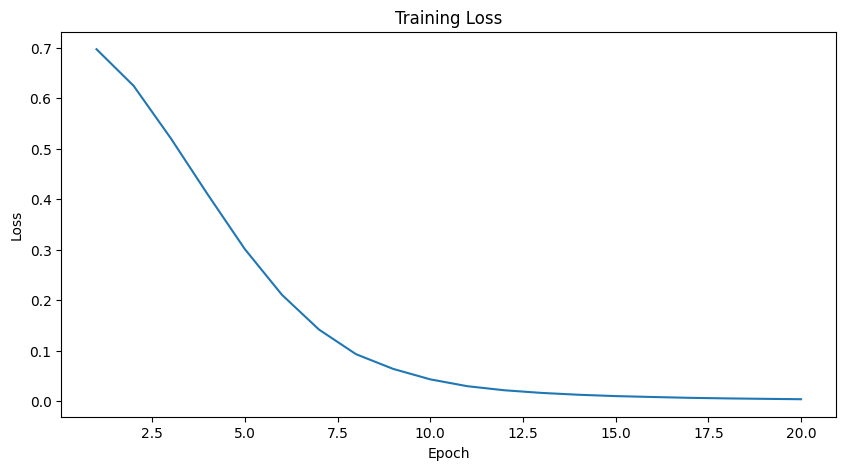

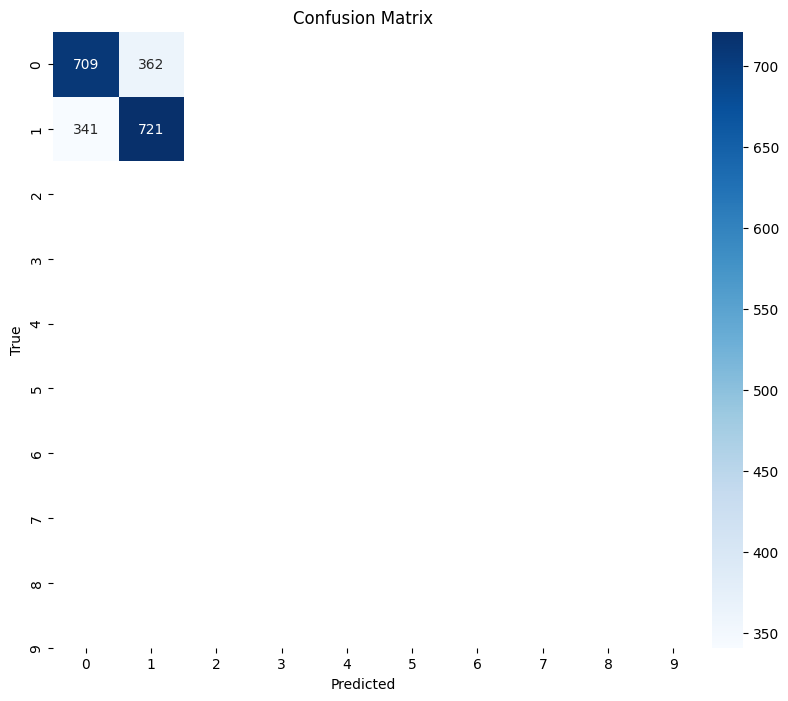

Accuracy on the test set: 67.04%


In [281]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd

# Define the classifier model with nn.Embedding, nn.Conv1d, and nn.MaxPool1d
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes, kernel_size, pool_size):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1d = nn.Conv1d(embedding_dim, 128, kernel_size)
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool1d(pool_size)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(128 * ((len(train_dataset[0][0]) - kernel_size + 1) // pool_size), num_classes)

    def forward(self, x):
        embedded = self.embedding(x)

    # Convert to dense tensor if embedded is sparse
        if embedded.is_sparse:
            embedded = embedded.to_dense()
        if len(embedded.shape) == 2:
        # Add a channel dimension
            embedded = embedded.unsqueeze(1)

        conv_output = self.conv1d(embedded.permute(0, 2, 1))
    # Transpose instead of permute
        # conv_output = self.conv1d(embedded.transpose(1, 2))
        activated = self.relu(conv_output)
        pooled = self.max_pool(activated)
        flattened = self.flatten(pooled)
        logits = self.fc(flattened)
        return logits





# Hyperparameters
vocab_size = len(vocab) # Assuming vocab_size based on your data

embedding_dim = 50
num_classes = 2  # Assuming binary classification
kernel_size = 3
pool_size = 2
learning_rate = 0.001
batch_size = 64
n_epochs = 20  # Adjust as needed
# Creating model, optimizer, and criterion
model = TextClassifier(vocab_size, embedding_dim, num_classes, kernel_size, pool_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training the classifier
train_and_evaluate_model(model, optimizer, train_loader, test_loader, 'cuda', criterion, n_epochs)



2.3 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)

Целевое значение accuracy на валидации - 70+%

In [282]:
import torch.nn.functional as F

In [290]:
# Assuming the model is already trained and loaded on the GPU ('cuda')
model.eval()

reviews = [
    "This movie was fantastic! I loved every moment of it.",
    "Terrible experience. The acting was bad, and the plot made no sense.",
    "Amazing product! It exceeded my expectations.",
    "Disappointing purchase. The quality is poor.",
]

max_review_length = len(train_dataset[0][0])  # Set the desired length

for review in reviews:
    # Tokenize, index, and pad/truncate the review
    indexed_review = torch.tensor(tokenize_and_index(review)[:max_review_length]).to('cuda')
    padded_review = F.pad(indexed_review, (0, max_review_length - len(indexed_review)))

    # Ensure the input has the expected shape
    if padded_review.dim() == 1:
        # Add a batch dimension
        padded_review = padded_review.unsqueeze(0)

    # Forward pass
    output = model(padded_review.long())  # Convert the input tensor to LongTensor
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]

    # Get top predictions
    top_probabilities, top_indices = torch.topk(probabilities, 2)  # Assuming binary classification
    predicted_sentiment = "Positive" if top_indices[0].item() == 1 else "Negative"

    print(f"Review: {review}\nPredicted Sentiment: {predicted_sentiment}, Probabilities: {top_probabilities}")
    print()


Review: This movie was fantastic! I loved every moment of it.
Predicted Sentiment: Positive, Probabilities: tensor([9.9995e-01, 5.3412e-05], device='cuda:0', grad_fn=<TopkBackward0>)

Review: Terrible experience. The acting was bad, and the plot made no sense.
Predicted Sentiment: Positive, Probabilities: tensor([0.9976, 0.0024], device='cuda:0', grad_fn=<TopkBackward0>)

Review: Amazing product! It exceeded my expectations.
Predicted Sentiment: Positive, Probabilities: tensor([0.8454, 0.1546], device='cuda:0', grad_fn=<TopkBackward0>)

Review: Disappointing purchase. The quality is poor.
Predicted Sentiment: Positive, Probabilities: tensor([0.9036, 0.0964], device='cuda:0', grad_fn=<TopkBackward0>)

